$\Huge{\text{Linear Regression with Regularizers}}$

$\Large{\text{Example on autompg data}}$

In this session, we shall learn about linear regression when we impose regularizers on the parameters. 

Let us first consider a sample data, which will be useful for our study of linear regression with regularizers. 

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import numpy as np 
# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider some open source data sets available in the internet. 
The data set we will consider represents miles per gallon for different car models as a response variable dependent on multiple attributes. 


In [ ]:
#Let us explore the data and the description 

#Get the data from the web 
auto_mpg_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data 
auto_mpg_data.head()


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
auto_mpg_data

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


What do the numbers in the above data mean? Let us understand the data by seeing its description. 

In [ ]:
import urllib.request  #this package is useful for accessing text files over internet 
auto_mpg_data_description_file = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names')


for line in auto_mpg_data_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line) 

1. Title: Auto-Mpg Data



2. Sources:

   (a) Origin:  This dataset was taken from the StatLib library which is

                maintained at Carnegie Mellon University. The dataset was 

                used in the 1983 American Statistical Association Exposition.

   (c) Date: July 7, 1993



3. Past Usage:

    -  See 2b (above)

    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.

       In Proceedings on the Tenth International Conference of Machine 

       Learning, 236-243, University of Massachusetts, Amherst. Morgan

       Kaufmann.



4. Relevant Information:



   This dataset is a slightly modified version of the dataset provided in

   the StatLib library.  In line with the use by Ross Quinlan (1993) in

   predicting the attribute "mpg", 8 of the original instances were removed 

   because they had unknown values for the "mpg" attribute.  The original 

   dataset is available in the file "auto-mpg.data-original".



   "The data concerns cit

Having known the data description, let us insert the descriptions into the data now.

In [ ]:
auto_mpg_data.columns = ['mpg', 'cylinders', 'displacement','horsepower', 'weight','acceleration','model year','origin','car name']


#check by printing the data again
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
##Counting number of missing values in each column
for col in auto_mpg_data.columns.values:
  val = set(auto_mpg_data[col])
  null_val = sum(pd.isna(auto_mpg_data[col]))
  print(col + ': ' + str(auto_mpg_data[col].dtypes) + ', ' + str(len(val)) + ' unique values, ' + str(null_val) + ' null values!')

# auto_mpg_data.isnull().sum()

mpg: float64, 129 unique values, 0 null values!
cylinders: int64, 5 unique values, 0 null values!
displacement: float64, 82 unique values, 0 null values!
horsepower: object, 94 unique values, 0 null values!
weight: float64, 351 unique values, 0 null values!
acceleration: float64, 95 unique values, 0 null values!
model year: int64, 13 unique values, 0 null values!
origin: int64, 3 unique values, 0 null values!
car name: object, 305 unique values, 0 null values!


In [ ]:
# auto_mpg_data = auto_mpg_data.astype(float)

**Dropping the rows that contains "?" in the column "Horsepower"**

Syntax = df[ df[ “column” ].str.contains( “someString” )==False ]

In [ ]:
auto_mpg_data = auto_mpg_data.replace('?', np.nan) #replacing '?' values by nan values

In [ ]:
auto_mpg_data = auto_mpg_data.dropna() #dropping the nan values
auto_mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
auto_mpg_data = auto_mpg_data.drop('car name', axis = 1) #dropping the column 'car name' as we don't need it
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
auto_mpg_data = auto_mpg_data.drop(['model year', 'origin'], axis = 1) #dropping the columns 'model year' and 'origin' as we don't need it
auto_mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5


In [ ]:
auto_mpg_data = auto_mpg_data.astype(float) #converting all the columns of the dataframe to float datatype

**Making a Train-Test-Validation split..**

In [ ]:
auto_mpg_train_initial = auto_mpg_data.sample(frac=0.8,random_state=200)
auto_mpg_test = auto_mpg_data.drop(auto_mpg_train_initial.index)

len(auto_mpg_train_initial), len(auto_mpg_test)

(314, 78)

In [ ]:
auto_mpg_train = auto_mpg_train_initial.sample(frac=0.8,random_state=200)
auto_mpg_val = auto_mpg_train_initial.drop(auto_mpg_train.index)

len(auto_mpg_train), len(auto_mpg_test), len(auto_mpg_val)

(251, 78, 63)

$\Large{\text{Computing } \beta \text{ for the mpg data set}}:$

In [ ]:
#Let us now compute beta 
n_train = len(auto_mpg_train.index) #number of data points in the data set
print('number of data points in the training data set:',n_train)
n_test = len(auto_mpg_test.index) #number of data points in the data set
print('number of data points in the testing data set:',n_test)
n_val = len(auto_mpg_val.index) #number of data points in the data set
print('number of data points in the validation data set:',n_val)

number of data points in the training data set: 251
number of data points in the testing data set: 78
number of data points in the validation data set: 63


In [ ]:
#extract the predictor variable columns 
cols = list(np.arange(1,6))
X_train = auto_mpg_train[auto_mpg_train.columns[cols]]
X_val = auto_mpg_val[auto_mpg_val.columns[cols]]
X_test = auto_mpg_test[auto_mpg_test.columns[cols]]

In [ ]:
X_train

,cylinders,displacement,horsepower,weight,acceleration
28,8.0,304.0,193.0,4732.0,18.5
154,6.0,250.0,72.0,3432.0,21.0
337,4.0,107.0,72.0,2290.0,17.0
93,8.0,318.0,150.0,4237.0,14.5
109,4.0,140.0,72.0,2401.0,19.5
...,...,...,...,...,...
371,4.0,135.0,84.0,2525.0,16.0
12,8.0,400.0,150.0,3761.0,9.5
379,4.0,98.0,70.0,2125.0,17.3
199,6.0,225.0,100.0,3651.0,17.7


In [ ]:
#convert predictor variable columns into a numpy array

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()

In [ ]:
X_train

array([[8.000e+00, 3.040e+02, 1.930e+02, 4.732e+03, 1.850e+01],
       [6.000e+00, 2.500e+02, 7.200e+01, 3.432e+03, 2.100e+01],
       [4.000e+00, 1.070e+02, 7.200e+01, 2.290e+03, 1.700e+01],
       ...,
       [4.000e+00, 9.800e+01, 7.000e+01, 2.125e+03, 1.730e+01],
       [6.000e+00, 2.250e+02, 1.000e+02, 3.651e+03, 1.770e+01],
       [6.000e+00, 1.460e+02, 1.200e+02, 2.930e+03, 1.380e+01]])

In [ ]:
import numpy as np
#add a column of ones to X_array
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1), dtype=X_test.dtype)))
X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1), dtype=X_val.dtype)))

In [ ]:
#convert predictor variable columns into a numpy array

response_cols = [0]
Y_train = auto_mpg_train[auto_mpg_train.columns[response_cols]].to_numpy()
Y_test = auto_mpg_test[auto_mpg_test.columns[response_cols]].to_numpy()
Y_val = auto_mpg_val[auto_mpg_val.columns[response_cols]].to_numpy()

In [ ]:
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X_train),X_train)
print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X_train),Y_train)
#print('Xy shape:',Xy.shape)

#solving a system of linear equations Ax=b, can be done using np.linalg.solve(A,b)

beta =np.linalg.solve(XTX,Xy)
#beta = np.matmul(np.linalg.inv(XTX),Xy)

print('beta',beta)



XTX shape: (6, 6)
beta [[-7.62518627e-01]
 [ 2.11672711e-03]
 [-6.05537356e-02]
 [-4.41112684e-03]
 [-3.73921880e-01]
 [ 5.22567833e+01]]


In [ ]:
print(np.linalg.matrix_rank(XTX))
XTX_inv = np.linalg.inv(XTX)

# print(np.matmul(XTX,XTX_inv))
is_identity = np.all(np.matmul(XTX,XTX_inv)==np.identity(XTX.shape[0]))
print(is_identity)

6
False


$\textbf{Note:}$ Because the matrix $X^\top X$ is full-rank, that is, $\text{rank}(X^\top X)=6$, we see that $\texttt{numpy}$ does not raise any error while computing the inverse of $X^\top X$. But, if it would have been not a full rank matrix, numpy might have raised an error. We will use $\texttt{scipy}$ to solve for $\beta$ and check if we get any error or not. 

In [ ]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

XTX = np.matmul(np.transpose(X_train),X_train)
#print('XTX shape:',XTX.shape)

Xy = np.matmul(np.transpose(X_train),Y_train)
#print('Xy shape:',Xy.shape)

beta =scipy.linalg.solve(XTX,Xy)
#beta = np.matmul(scipy.linalg.inv(XTX),Xy)

In [ ]:
beta

array([[-7.62518627e-01],
       [ 2.11672711e-03],
       [-6.05537356e-02],
       [-4.41112684e-03],
       [-3.73921880e-01],
       [ 5.22567833e+01]])

Let us compute the condition number of $X^\top X$.

In [ ]:
#condition number of XTX
print(np.linalg.cond(XTX))

1419028386.6829903


We can see that the ill-conditioning of $X^\top X$ might lead to wild changes in solutions of linear regression parameters, even for small changes in the output $\mathbf{y}$. 

With $\lambda \in \{0, 10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100, 1000, 10000\}$ let us check the condition number of $(X^\top X+\lambda I)$. 

In [ ]:
lambdas = np.array([0,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000])
I = np.identity(XTX.shape[0])

for lambda_ in lambdas:
  print('lambda:',lambda_,'cond(XTX+lambda I):', np.linalg.cond(XTX+lambda_*I))

lambda: 0.0 cond(XTX+lambda I): 1419028386.6829903
lambda: 1e-05 cond(XTX+lambda I): 1419020062.6554246
lambda: 0.0001 cond(XTX+lambda I): 1418945150.5655804
lambda: 0.001 cond(XTX+lambda I): 1418196464.4657156
lambda: 0.01 cond(XTX+lambda I): 1410752829.3206623
lambda: 0.1 cond(XTX+lambda I): 1340399764.1572158
lambda: 1.0 cond(XTX+lambda I): 894379952.8491516
lambda: 10.0 cond(XTX+lambda I): 206672951.1364076
lambda: 100.0 cond(XTX+lambda I): 23785027.4660599
lambda: 1000.0 cond(XTX+lambda I): 2414933.724689472
lambda: 10000.0 cond(XTX+lambda I): 241864.7204158054


With $\lambda \in \{0, 10^{-5},10^{-4}, 10^{-3},10^{-2},0.1, 1, 10, 100, 1000, 10000\}$ , let us now solve for $\beta$ and check the solutions.

In [ ]:
import scipy.linalg
#Now we are ready for finding beta
#print('X shape:',X.shape,'y shape:',y.shape)

betas = [] 
for lambda_ in lambdas:
  beta =scipy.linalg.solve(XTX+lambda_*I,Xy)
  print('lambda:',lambda_)
  print('beta:',beta)
  print('***************')
  betas.append(beta)

lambda: 0.0
beta: [[-7.62518627e-01]
 [ 2.11672711e-03]
 [-6.05537356e-02]
 [-4.41112684e-03]
 [-3.73921880e-01]
 [ 5.22567833e+01]]
***************
lambda: 1e-05
beta: [[-7.62498652e-01]
 [ 2.11636006e-03]
 [-6.05526317e-02]
 [-4.41114136e-03]
 [-3.73909414e-01]
 [ 5.22564782e+01]]
***************
lambda: 0.0001
beta: [[-7.62318892e-01]
 [ 2.11305684e-03]
 [-6.05426971e-02]
 [-4.41127199e-03]
 [-3.73797229e-01]
 [ 5.22537326e+01]]
***************
lambda: 0.001
beta: [[-7.60522352e-01]
 [ 2.08004399e-03]
 [-6.04434081e-02]
 [-4.41257757e-03]
 [-3.72676022e-01]
 [ 5.22262923e+01]]
***************
lambda: 0.01
beta: [[-7.42662253e-01]
 [ 1.75184078e-03]
 [-5.94562431e-02]
 [-4.42555720e-03]
 [-3.61528569e-01]
 [ 5.19534739e+01]]
***************
lambda: 0.1
beta: [[-5.74008595e-01]
 [-1.34832630e-03]
 [-5.01253813e-02]
 [-4.54816018e-03]
 [-2.56157419e-01]
 [ 4.93749382e+01]]
***************
lambda: 1.0
beta: [[ 4.85325902e-01]
 [-2.08824238e-02]
 [ 9.07797377e-03]
 [-5.32057850e-03]
 [ 4

$\Large{\text{Residual Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_0 + \sum_{j=1}^{d} \beta_j x^i_j$.  

[array([1.67775867]), array([-5.85963752]), array([3.78482283]), array([0.36511855]), array([-6.26058939]), array([4.00690192]), array([-3.12138092]), array([0.60824256]), array([2.43913856]), array([6.90940192]), array([3.0220698]), array([-5.07948237]), array([5.34709258]), array([-4.83413852]), array([-1.7017399]), array([3.75383316]), array([3.66483608]), array([3.941397]), array([1.69265383]), array([-2.7603175]), array([-2.43108456]), array([7.25621641]), array([5.50704723]), array([0.93817664]), array([0.96164458]), array([0.11489597]), array([-4.52120523]), array([-1.46102446]), array([-3.76842173]), array([1.2640342]), array([-4.56361419]), array([-4.12225299]), array([11.64204347]), array([-4.39130263]), array([4.63752991]), array([-0.52762268]), array([-6.19693285]), array([-5.61373014]), array([0.33858552]), array([-3.50469087]), array([-2.30440932]), array([-3.64013232]), array([5.33890519]), array([-2.49515211]), array([6.56591479]), array([0.54126173]), array([0.98926806

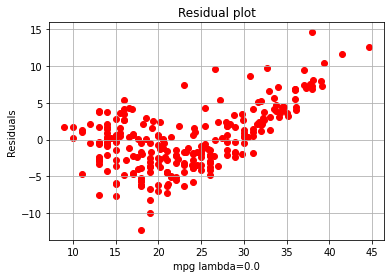

[array([1.67764056]), array([-5.85965197]), array([3.78482913]), array([0.36509572]), array([-6.26060053]), array([4.00693684]), array([-3.1213536]), array([0.60822308]), array([2.43911317]), array([6.90945628]), array([3.02210662]), array([-5.07949246]), array([5.34707446]), array([-4.83412991]), array([-1.70175546]), array([3.7538571]), array([3.66481055]), array([3.94143124]), array([1.69258639]), array([-2.76034414]), array([-2.4310955]), array([7.25625819]), array([5.50706729]), array([0.93823246]), array([0.96163741]), array([0.11488913]), array([-4.5212221]), array([-1.46102081]), array([-3.76837868]), array([1.26395971]), array([-4.56361127]), array([-4.12224656]), array([11.64206861]), array([-4.39131726]), array([4.63752349]), array([-0.5276416]), array([-6.1969346]), array([-5.61368547]), array([0.33860016]), array([-3.50467991]), array([-2.30437727]), array([-3.64012368]), array([5.33884091]), array([-2.49515973]), array([6.56592673]), array([0.54124989]), array([0.98926078

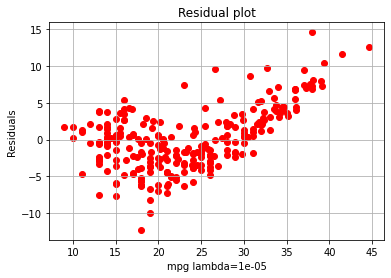

[array([1.67657762]), array([-5.85978196]), array([3.78488586]), array([0.3648903]), array([-6.26070076]), array([4.00725111]), array([-3.12110775]), array([0.60804782]), array([2.43888469]), array([6.90994547]), array([3.02243792]), array([-5.07958327]), array([5.34691141]), array([-4.83405239]), array([-1.70189549]), array([3.7540726]), array([3.66458084]), array([3.94173939]), array([1.69197942]), array([-2.76058395]), array([-2.43119388]), array([7.25663419]), array([5.50724776]), array([0.93873483]), array([0.96157291]), array([0.11482758]), array([-4.52137398]), array([-1.46098794]), array([-3.76799122]), array([1.26328933]), array([-4.56358503]), array([-4.12218871]), array([11.64229482]), array([-4.39144888]), array([4.63746573]), array([-0.52781184]), array([-6.19695036]), array([-5.61328349]), array([0.33873196]), array([-3.5045813]), array([-2.30408883]), array([-3.64004593]), array([5.3382624]), array([-2.49522826]), array([6.56603418]), array([0.54114332]), array([0.989195

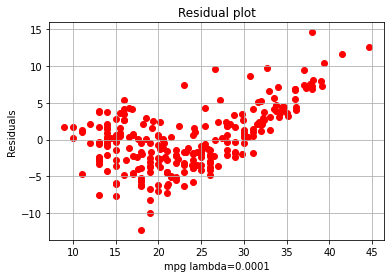

[array([1.66595436]), array([-5.86108113]), array([3.78545278]), array([0.36283721]), array([-6.2617025]), array([4.01039206]), array([-3.11865061]), array([0.60629623]), array([2.4366012]), array([6.91483456]), array([3.02574907]), array([-5.08049089]), array([5.34528182]), array([-4.83327765]), array([-1.70329499]), array([3.75622629]), array([3.66228511]), array([3.94481914]), array([1.6859132]), array([-2.76298067]), array([-2.43217716]), array([7.26039205]), array([5.5090514]), array([0.94375562]), array([0.96092825]), array([0.11421244]), array([-4.52289189]), array([-1.46065939]), array([-3.76411887]), array([1.25658942]), array([-4.56332278]), array([-4.12161059]), array([11.64455563]), array([-4.39276429]), array([4.63688846]), array([-0.52951321]), array([-6.19710785]), array([-5.60926598]), array([0.34004916]), array([-3.50359577]), array([-2.30120603]), array([-3.63926887]), array([5.33248067]), array([-2.49591316]), array([6.56710814]), array([0.54007827]), array([0.988540

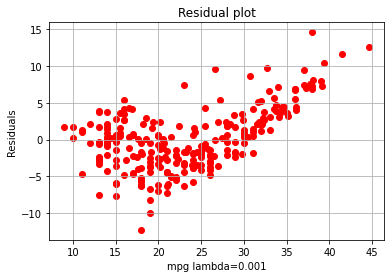

[array([1.5603346]), array([-5.87399886]), array([3.79108927]), array([0.34242529]), array([-6.2716632]), array([4.04162107]), array([-3.09422071]), array([0.58888143]), array([2.41389848]), array([6.96344295]), array([3.05866973]), array([-5.08951491]), array([5.32907879]), array([-4.82557504]), array([-1.71720959]), array([3.77763715]), array([3.63946132]), array([3.97543915]), array([1.62560011]), array([-2.78681068]), array([-2.44195234]), array([7.29775412]), array([5.52698414]), array([0.99367345]), array([0.9545193]), array([0.10809611]), array([-4.53798194]), array([-1.45739304]), array([-3.72561879]), array([1.1899771]), array([-4.56071433]), array([-4.11586229]), array([11.66703375]), array([-4.40584037]), array([4.63114924]), array([-0.54642815]), array([-6.19867267]), array([-5.56932292]), array([0.35314535]), array([-3.49379766]), array([-2.27254361]), array([-3.63154164]), array([5.27499476]), array([-2.50272198]), array([6.57778523]), array([0.52948988]), array([0.982032

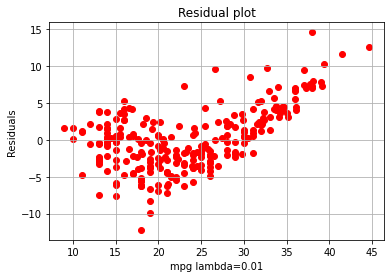

[array([0.5620266]), array([-5.99618603]), array([3.84435751]), array([0.14954281]), array([-6.36590839]), array([4.33686251]), array([-2.86328541]), array([0.42428556]), array([2.19935974]), array([7.42283837]), array([3.36985483]), array([-5.17482823]), array([5.17582354]), array([-4.75278529]), array([-1.84875556]), array([3.9798352]), array([3.42384292]), array([4.26487155]), array([1.05544814]), array([-3.01215761]), array([-2.53426541]), array([7.65092394]), array([5.69651436]), array([1.46544503]), array([0.89398063]), array([0.05025081]), array([-4.68047288]), array([-1.4265331]), array([-3.36172271]), array([0.56039149]), array([-4.53595484]), array([-4.06149486]), array([11.87953065]), array([-4.52922439]), array([4.57692154]), array([-0.70624153]), array([-6.21337134]), array([-5.19181409]), array([0.47694719]), array([-3.4012202]), array([-2.00155611]), array([-3.55836639]), array([4.73144726]), array([-2.56701647]), array([6.67865384]), array([0.42947305]), array([0.920565

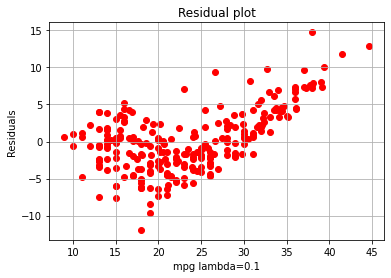

[array([-5.77024058]), array([-6.77714348]), array([4.18175963]), array([-1.07068157]), array([-6.97012277]), array([6.21405226]), array([-1.39674006]), array([-0.61926524]), array([0.84153972]), array([10.33371665]), array([5.34515798]), array([-5.71722456]), array([4.19675619]), array([-4.29204264]), array([-2.68489744]), array([5.25079682]), array([2.06344244]), array([6.10172949]), array([-2.56619207]), array([-4.44864648]), array([-3.11446835]), array([9.89286077]), array([6.77393839]), array([4.45478879]), array([0.51248034]), array([-0.31892469]), array([-5.57515955]), array([-1.231665]), array([-1.05373401]), array([-3.43124147]), array([-4.37199396]), array([-3.71432504]), array([13.22976113]), array([-5.29801571]), array([4.23420674]), array([-1.71565681]), array([-6.30054657]), array([-2.7991954]), array([1.26339599]), array([-2.81620136]), array([-0.27787284]), array([-3.08510512]), array([1.27081047]), array([-2.97075794]), array([7.31514967]), array([-0.20074594]), array(

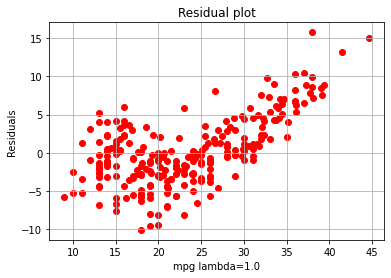

[array([-15.60327537]), array([-8.10921036]), array([4.69682801]), array([-2.90053855]), array([-8.03703688]), array([9.22238662]), array([0.91489252]), array([-2.22838042]), array([-1.20194437]), array([14.78954171]), array([8.44184802]), array([-6.58430512]), array([2.53333585]), array([-3.59770586]), array([-4.0182869]), array([6.98106158]), array([0.10496916]), array([8.97395425]), array([-8.29643095]), array([-6.82576833]), array([-3.90631825]), array([13.41060517]), array([8.49159446]), array([9.03154015]), array([-0.03213306]), array([-0.93869185]), array([-6.77882611]), array([-0.9470154]), array([2.52532352]), array([-9.59270717]), array([-3.97268603]), array([-3.1271694]), array([15.37497736]), array([-6.20619119]), array([3.72986183]), array([-3.1959599]), array([-6.30981359]), array([0.8764951]), array([2.5085694]), array([-1.95296581]), array([2.49793461]), array([-2.1619917]), array([-4.3659221]), array([-3.51362088]), array([8.23419944]), array([-1.09486994]), array([-0.

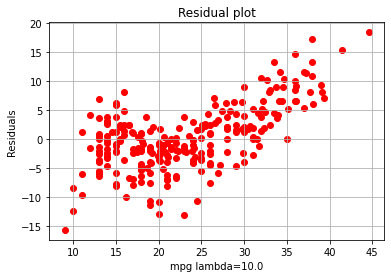

[array([-18.71326021]), array([-9.00455158]), array([4.86863438]), array([-3.22681658]), array([-8.84938613]), array([10.72833509]), array([1.75963417]), array([-2.59665007]), array([-1.32882855]), array([15.79876405]), array([9.53843591]), array([-6.93172178]), array([1.28719113]), array([-3.56072876]), array([-4.56846013]), array([5.98977067]), array([0.53160037]), array([9.95875806]), array([-10.66231589]), array([-8.33951963]), array([-3.63494808]), array([14.69513275]), array([9.34863346]), array([10.06489993]), array([-0.15742349]), array([-1.37096191]), array([-6.32944652]), array([-0.94485649]), array([3.59316403]), array([-11.38961571]), array([-2.96047289]), array([-2.6724869]), array([16.29826336]), array([-4.96378631]), array([3.83071647]), array([-3.26596648]), array([-5.58147006]), array([1.82436151]), array([3.01394332]), array([-1.90989968]), array([3.90041784]), array([-0.85707071]), array([-7.34590967]), array([-3.24223289]), array([8.10315245]), array([-1.03438111]),

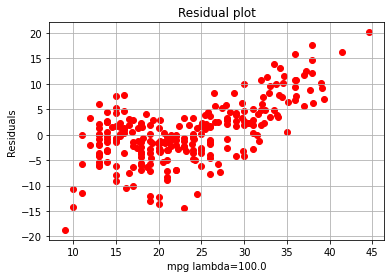

[array([-21.21620208]), array([-8.02943049]), array([5.70748844]), array([-4.49692572]), array([-7.19331638]), array([12.98573518]), array([1.6606401]), array([-1.81205977]), array([1.02034338]), array([15.6677384]), array([10.01379074]), array([-6.51961648]), array([0.38133042]), array([-4.50912257]), array([-4.3821096]), array([1.27098181]), array([4.29411673]), array([10.43935147]), array([-12.7315359]), array([-9.78929985]), array([-3.83851023]), array([15.56718414]), array([11.17420359]), array([9.83110434]), array([-2.79705911]), array([-1.72474266]), array([-7.4215831]), array([-0.89277382]), array([3.94930026]), array([-13.2903497]), array([-0.19557987]), array([-1.98029727]), array([17.02650096]), array([-2.93822787]), array([5.45354914]), array([-3.90236291]), array([-3.82164339]), array([2.41076593]), array([3.2838248]), array([-1.87139154]), array([5.30401506]), array([0.93173425]), array([-7.96547813]), array([-2.82014452]), array([7.10529094]), array([-2.10161207]), array

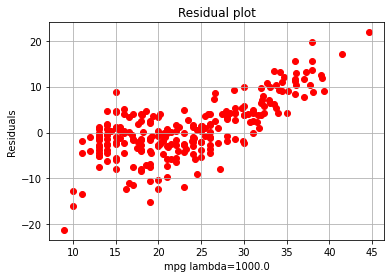

[array([-25.90446767]), array([-4.45131916]), array([7.95954496]), array([-8.28459522]), array([-1.38607222]), array([17.43015049]), array([0.81770382]), array([0.59908895]), array([6.79921406]), array([15.41730582]), array([10.5430805]), array([-4.81600641]), array([0.18410652]), array([-6.94571065]), array([-3.53797545]), array([-8.742639]), array([12.85236234]), array([11.12053178]), array([-15.74564941]), array([-11.48883262]), array([-5.48228714]), array([16.89724583]), array([15.26044189]), array([9.30494332]), array([-10.15702402]), array([-2.16125743]), array([-11.81820106]), array([-0.38166155]), array([4.43985748]), array([-17.26014213]), array([5.19617332]), array([-0.69092344]), array([18.18846061]), array([-0.47060481]), array([9.49175356]), array([-6.33256658]), array([-0.67947822]), array([3.50105438]), array([3.28249417]), array([-1.18849094]), array([7.55642671]), array([3.36299586]), array([-5.9587904]), array([-2.64027092]), array([5.36792286]), array([-5.71252677]),

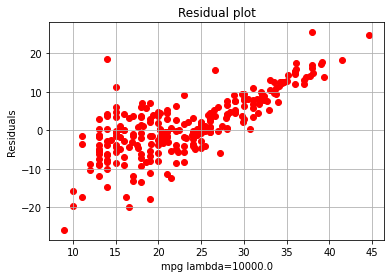

In [ ]:
beta_idx = 0
for lambda_ in lambdas: 
  beta = betas[beta_idx]
  beta_idx += 1
  xlabel = 'mpg lambda='+str(lambda_)
  e_i_residuals_list = [] 

  for i in range(n_train): 
    x_i = X_train[i,:] #access i-th row of X
    y_i = Y_train[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    e_i_residuals_list.append(e_i) #append the value of e_i to the list 
  print(e_i_residuals_list)

  #plot the residuals e_i against the actual observations y_i
  plt.scatter(auto_mpg_train['mpg'], e_i_residuals_list,color='r')
  plt.title("Residual plot")
  plt.xlabel(xlabel)
  plt.ylabel("Residuals")
  plt.grid()
  plt.show()

Note that the residual plot helps to check the variance in the errors $e^i$. 

$\Large{\text{Coefficient of multiple determination for high dimensions}}$ 


Let us compute $R^2$. 

In [ ]:
#We shall now compute R^2 for auto mpg data
R_sq_train = []
R_sq_val = []
MSE_train = []
MSE_val = []
#first we shall compute y_bar 
y_bar_train = 0
for i in range(n_train): #access each row from the data set 
  y_i_train = float(auto_mpg_train.iat[i,0]) #access element at mpg column
  y_bar_train += y_i_train

y_bar_train /= n_train
print('y_bar_train',y_bar_train)

y_bar_val = 0
for i in range(n_val): #access each row from the data set 
  y_i_val = float(auto_mpg_val.iat[i,0]) #access element at mpg column
  y_bar_val += y_i_val

y_bar_val /= n_val
print('y_bar_val',y_bar_val)


#Next we shall compute sigma_yy, which is the variance of y 
sigma_yy_train = 0
for i in range(n_train): #access each row from the data set 
  y_i_train = float(auto_mpg_train.iat[i,0]) #access element at mpg column
  sigma_yy_train += (y_i_train-y_bar_train)**2

print('sigma_yy_train:', sigma_yy_train)

sigma_yy_val = 0
for i in range(n_val): #access each row from the data set 
  y_i_val = float(auto_mpg_val.iat[i,0]) #access element at mpg column
  sigma_yy_val += (y_i_val-y_bar_val)**2

print('sigma_yy_val:', sigma_yy_val)
print('\n_________________________\n')

#now we can compute sum of squared residuals 
beta_idx = 0
for lambda_ in lambdas:
  beta = betas[beta_idx]
  beta_idx+=1
  sum_sq_residuals_train = 0
  sum_sq_residuals_val = 0
  for i in range(n_train): #access each row from the data set 
    x_i_train = X_train[i,:] #access i-th row of X
    y_i_train = Y_train[i] #access i-th row of y

    y_pred_i_train = np.dot(x_i_train,beta) #compute the prediction obtained using the regression coefficients 
    e_i_train = y_i_train - y_pred_i_train #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals_train += (e_i_train)**2

  for i in range(n_val): #access each row from the data set 
    x_i_val = X_val[i,:] #access i-th row of X
    y_i_val = Y_val[i] #access i-th row of y

    y_pred_i_val = np.dot(x_i_val,beta) #compute the prediction obtained using the regression coefficients 
    e_i_val = y_i_val - y_pred_i_val #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals_val += (e_i_val)**2


  print('lambda:',lambda_)
  print('sum of squared residuals for training data:', sum_sq_residuals_train)
  MSE_train.append(sum_sq_residuals_train/n_train)
  #Then we will compute the R^2 quantity
  R_sq = 1-sum_sq_residuals_train/sigma_yy_train
  R_sq_train.append(R_sq)
  print('R^2 for training data:',R_sq)

  print('sum of squared residuals for validation data:', sum_sq_residuals_val)
  MSE_val.append(sum_sq_residuals_val/n_val)

  #Then we will compute the R^2 quantity
  R_sq_vali = 1-sum_sq_residuals_val/sigma_yy_val
  R_sq_val.append(R_sq_vali)
  print('R^2 for validation data:',R_sq_vali)
  print('\n*******************************************************************\n')

y_bar_train 23.18366533864542
y_bar_val 23.05714285714286
sigma_yy_train: 14573.343027888452
sigma_yy_val: 4289.494285714284

_________________________

lambda: 0.0
sum of squared residuals for training data: [4326.9049026]
R^2 for training data: [0.70309455]
sum of squared residuals for validation data: [1383.02097441]
R^2 for validation data: [0.67757948]

*******************************************************************

lambda: 1e-05
sum of squared residuals for training data: [4326.90490275]
R^2 for training data: [0.70309455]
sum of squared residuals for validation data: [1383.01759436]
R^2 for validation data: [0.67758027]

*******************************************************************

lambda: 0.0001
sum of squared residuals for training data: [4326.90491856]
R^2 for training data: [0.70309455]
sum of squared residuals for validation data: [1382.98717802]
R^2 for validation data: [0.67758736]

*******************************************************************

lambda: 0

**How to choose good value of Lambda-**

:**Graph between $R^2$ and $λ$ values for training and validation data-**

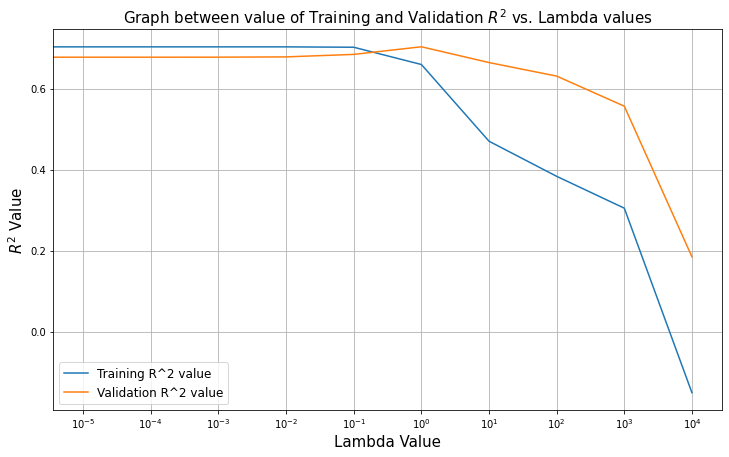

In [ ]:
plt.figure(figsize =(12,7))
plt.plot(lambdas,R_sq_train,label = "Training R^2 value")
plt.plot(lambdas,R_sq_val,label = "Validation R^2 value")
plt.ylabel("$R^2$ Value",fontsize = 15)
plt.xlabel("Lambda Value",fontsize = 15)
plt.xscale('log')
plt.xticks([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000])
plt.legend(fontsize = 12,loc = "best")
plt.title("Graph between value of Training and Validation $R^2$ vs. Lambda values",fontsize = 15)
plt.grid()
plt.show()

**Graph between $MSE$ and $λ$ values for training and validation data-**

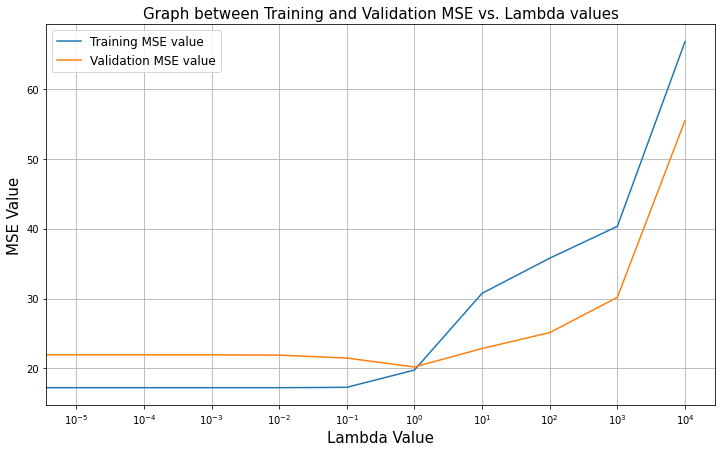

In [ ]:
plt.figure(figsize =(12,7))
plt.plot(lambdas,MSE_train,label = "Training MSE value")
plt.plot(lambdas,MSE_val,label = "Validation MSE value")
plt.ylabel("MSE Value",fontsize = 15)
plt.xlabel("Lambda Value",fontsize = 15)
plt.xscale("log")
plt.xticks([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000])
plt.legend(fontsize = 12,loc = "best")
plt.title("Graph between Training and Validation MSE vs. Lambda values",fontsize = 15)
plt.grid()
plt.show()

As we can see, increasing the value of $\lambda$ leads to lower $R^2$ values which indicates that the unexplained variations captured by the regression parameters is not significant when compared to the variations captured by the mean $\bar{\mathbf{y}}$. 

Also note that increasing $\lambda$ leads to residual plots where the variance in the predicted values become smaller and smaller when compared to lower values of $\lambda$. However it might turn out that on an average, the estimated parameters might be away from the actual parameters which were possibly responsible for the data. This leads to a larger bias in the estimated model parameters. This phenomenon is one explanation for the popular $\textbf{bias-variance}$ tradeoff.

# **Doing K-Fold Cross Validatiion-**

In [ ]:
def compute_Rsquared_and_MSE(data, beta, X, Y): 

  #first we shall compute y_bar 
  y_bar = 0.
  n = len(data)
  for i in range(n): #access each row from the data set 
    y_i= float(data.iat[i,0]) #access element at mpg column
    y_bar += y_i

  y_bar /= n
  #print('y_bar',y_bar)


  #Next we shall compute sigma_yy, which is the variance of y 
  sigma_yy = 0
  for i in range(n): #access each row from the data set 
    y_i = float(data.iat[i,0]) #access element at mpg column
    sigma_yy += (y_i-y_bar)**2

  #print('sigma_yy:', sigma_yy)

  #print('\n_________________________\n')

  #now we can compute sum of squared residuals 
  sum_sq_residuals = 0.
  for i in range(n): #access each row from the data set 
    x_i = X[i,:] #access i-th row of X
    y_i = Y[i] #access i-th row of y

    y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
    e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

    sum_sq_residuals += (e_i)**2

    
  #Then we will compute the R^2 quantity and MSE
  R_sq = 1-sum_sq_residuals/sigma_yy
  MSE = sum_sq_residuals/n
  print('R^2 :',R_sq, ' MSE:',MSE)
  return R_sq, MSE


In [ ]:

import scipy
from scipy import linalg
seed = 2000
auto_mpg_train_initial = auto_mpg_data.sample(frac=0.8,random_state=seed)
auto_mpg_test = auto_mpg_data.drop(auto_mpg_train_initial.index)


seeds = [100, 200,300,400,500]

lambdas = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1,10,100,1000, 10000]

train_R2_seeds = [] 
val_R2_seeds = [] 

train_MSE_seeds = [] 
val_MSE_seeds = [] 
cols = list(np.arange(1,6))
response_cols = [0]

for seed in seeds: 
  auto_mpg_train = auto_mpg_train_initial.sample(frac=0.8,random_state=seed)
  auto_mpg_val = auto_mpg_train_initial.drop(auto_mpg_train.index)

  X_train = auto_mpg_train[auto_mpg_train.columns[cols]]
  X_val = auto_mpg_val[auto_mpg_val.columns[cols]]
  

  X_train = X_train.to_numpy()
  X_val = X_val.to_numpy()

  X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
  X_val = np.hstack((X_val, np.ones((X_val.shape[0], 1), dtype=X_val.dtype)))
  
  Y_train = auto_mpg_train[auto_mpg_train.columns[response_cols]].to_numpy()
  Y_val = auto_mpg_val[auto_mpg_val.columns[response_cols]].to_numpy()

  train_R2_lambdas = []
  val_R2_lambdas = []

  train_MSE_lambdas = []
  val_MSE_lambdas = []
  
  for lambda_ in lambdas:
    XTX = np.matmul(np.transpose(X_train),X_train)
    Xy = np.matmul(np.transpose(X_train),Y_train)
    I = np.identity(X_train.shape[1])

    beta =scipy.linalg.solve( XTX+lambda_*I,Xy)
    print('lambda:',lambda_)
    print('beta:',beta)
    print('***************')

    train_R2, train_MSE = compute_Rsquared_and_MSE(auto_mpg_train, beta, X_train, Y_train)
    train_R2_lambdas.append(train_R2)
    train_MSE_lambdas.append(train_MSE)

    val_R2, val_MSE = compute_Rsquared_and_MSE(auto_mpg_val, beta, X_val, Y_val)
    val_R2_lambdas.append(val_R2)
    val_MSE_lambdas.append(val_MSE)

  train_R2_seeds.append(np.array(train_R2_lambdas))
  train_MSE_seeds.append(np.array(train_MSE_lambdas))

  val_R2_seeds.append(np.array(val_R2_lambdas))
  val_MSE_seeds.append(np.array(val_MSE_lambdas))

val_R2_seeds = np.array(val_R2_seeds).squeeze()
print(val_R2_seeds)

mean_val_R2_lambdas = np.mean(val_R2_seeds,axis=0)

train_R2_seeds = np.array(train_R2_seeds).squeeze()
print(train_R2_seeds)

mean_train_R2_lambdas = np.mean(train_R2_seeds,axis=0)

#print('k-fold train R2 values:', train_R2_seeds)

#print('k-fold train MSEs:', train_MSE_seeds)

print('k-fold val R2 values:', mean_val_R2_lambdas.squeeze())
print('k-fold train R2 values:', mean_train_R2_lambdas.squeeze())

#print('k-fold val MSEs:', val_MSE_seeds)


best_lambda_idx = np.argmax(mean_val_R2_lambdas)
best_lambda = lambdas[best_lambda_idx]

print('best lambda:', best_lambda)


X_train = auto_mpg_train_initial[auto_mpg_train_initial.columns[cols]]
X_train = X_train.to_numpy()

X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1), dtype=X_train.dtype)))
Y_train = auto_mpg_train_initial[auto_mpg_train_initial.columns[response_cols]].to_numpy()

X_test = auto_mpg_test[auto_mpg_test.columns[cols]]
X_test = X_test.to_numpy()
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1), dtype=X_test.dtype)))
Y_test = auto_mpg_test[auto_mpg_test.columns[response_cols]].to_numpy()


XTX = np.matmul(np.transpose(X_train),X_train)
Xy = np.matmul(np.transpose(X_train),Y_train)
I = np.identity(X_train.shape[1])

beta =scipy.linalg.solve( XTX+best_lambda*I,Xy)
print('lambda:',best_lambda)
print('Final beta:',beta)
print('***************')

train_R2, train_MSE = compute_Rsquared_and_MSE(auto_mpg_train_initial, beta, X_train, Y_train)

test_R2, test_MSE = compute_Rsquared_and_MSE(auto_mpg_test, beta, X_test, Y_test)

print('Train R^2 :', train_R2, ' Train MSE:', train_MSE)
print('Test R^2 :', test_R2, ' Test MSE:', test_MSE)






lambda: 1e-05
beta: [[-3.68664310e-01]
 [-1.66164986e-03]
 [-3.38968831e-02]
 [-5.42672414e-03]
 [-1.27507010e-02]
 [ 4.58348983e+01]]
***************
R^2 : [0.711848]  MSE: [18.11663619]
R^2 : [0.65712488]  MSE: [19.9750094]
lambda: 0.0001
beta: [[-3.68521409e-01]
 [-1.66512680e-03]
 [-3.38872420e-02]
 [-5.42676586e-03]
 [-1.26543449e-02]
 [ 4.58324005e+01]]
***************
R^2 : [0.711848]  MSE: [18.11663624]
R^2 : [0.65712653]  MSE: [19.97491359]
lambda: 0.001
beta: [[-3.67093273e-01]
 [-1.69987511e-03]
 [-3.37908887e-02]
 [-5.42718270e-03]
 [-1.16913619e-02]
 [ 4.58074378e+01]]
***************
R^2 : [0.71184792]  MSE: [18.11664125]
R^2 : [0.6571429]  MSE: [19.97395985]
lambda: 0.01
beta: [[-3.52898731e-01]
 [-2.04526401e-03]
 [-3.28331143e-02]
 [-5.43132555e-03]
 [-2.11905326e-03]
 [ 4.55593046e+01]]
***************
R^2 : [0.71184003]  MSE: [18.11713715]
R^2 : [0.65729925]  MSE: [19.96485145]
lambda: 0.1
beta: [[-2.19138004e-01]
 [-5.30172675e-03]
 [-2.37982259e-02]
 [-5.47033765e-

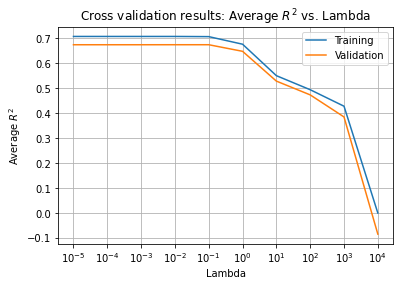

In [ ]:
plt.plot(lambdas, mean_train_R2_lambdas,label = "Training")
plt.plot(lambdas, mean_val_R2_lambdas,label = "Validation")
plt.xscale('log')
plt.title('Cross validation results: Average $R^2$ vs. Lambda')
plt.ylabel('Average $R^2$')
plt.xlabel('Lambda')
plt.xticks([1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000])
plt.grid()
plt.legend()
plt.show()

# **Taking the best lambda value for training on the train+val data.**

In [ ]:
X_train_full = auto_mpg_train_initial[auto_mpg_train_initial.columns[cols]]
X_train_full = X_train_full.to_numpy()
X_train_full = np.hstack((X_train_full, np.ones((X_train_full.shape[0], 1), dtype=X_train_full.dtype)))
Y_train_full = auto_mpg_train_initial[auto_mpg_train_initial.columns[response_cols]].to_numpy()

**Training on full training dataset-**

In [ ]:
XTX = np.matmul(np.transpose(X_train_full),X_train_full)
lambda_ = best_lambda
Xy = np.matmul(np.transpose(X_train_full),Y_train_full)
I = np.identity(XTX.shape[0])
beta =scipy.linalg.solve(XTX+lambda_*I,Xy)
print('lambda:',lambda_)
print('beta:',beta)
print('***************')

lambda: 0.1
beta: [[-2.10216193e-01]
 [ 1.34714111e-03]
 [-3.08104376e-02]
 [-5.98765935e-03]
 [ 1.52628888e-01]
 [ 4.31287792e+01]]
***************


**Checking performance on test datset-**

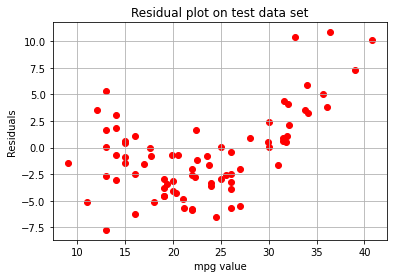

In [ ]:
e_i_residuals_list = [] 
n = len(auto_mpg_test.index)
for i in range(n): 
  x_i = X_test[i,:] #access i-th row of X
  y_i = Y_test[i] #access i-th row of y

  y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list.append(e_i) #append the value of e_i to the list 

#plot the residuals e_i against the actual observations y_i
plt.scatter(auto_mpg_test['mpg'], e_i_residuals_list,color='r')
plt.title("Residual plot on test data set")
plt.xlabel("mpg value")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [ ]:
#first we shall compute y_bar 
print('Peformance on test data:')
y_bar = 0
for i in range(n): #access each row from the data set 
  y_i = float(auto_mpg_test.iat[i,0]) #access element at mpg column
  y_bar += y_i

y_bar /= n
print('y_bar',y_bar)

#Next we shall compute sigma_yy, which is the variance of y 
sigma_yy = 0
for i in range(n): #access each row from the data set 
  y_i = float(auto_mpg_test.iat[i,0]) #access element at mpg column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#now we can compute sum of squared residuals 

sum_sq_residuals = 0
for i in range(n): #access each row from the data set 
  x_i = X_test[i,:] #access i-th row of X
  y_i = Y_test[i] #access i-th row of y

  y_pred_i = np.dot(x_i,beta) #compute the prediction obtained using the regression coefficients 
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  sum_sq_residuals += (e_i)**2

print('lambda:',lambda_)
print('sum of squared residuals:', sum_sq_residuals)

#Then we will compute the R^2 quantity
R_sq = 1-sum_sq_residuals/sigma_yy
print('R^2:',R_sq)
print('*********************')

Peformance on test data:
y_bar 23.051282051282048
sigma_yy: 4346.234871794873
lambda: 0.1
sum of squared residuals: [1221.52135587]
R^2: [0.71894723]
*********************
